In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 10 10:42:09 2018

@author: Bryan Tarras (modified), Rosario (original)
"""

import pandas as pd
import numpy as np
import math
pd.core.common.is_list_like = pd.api.types.is_list_like #datareader problem probably fixed in next version of datareader
from pandas_datareader import data as pdr
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
#import detrendPrice
#import WhiteRealityCheckFor1

import yfinance as yf
#yf.pdr_override() # <== that's all it takes :-)

In [2]:
def getDate(dt):
    if type(dt) != str:
        return dt
    try:
        datetime_object = datetime.datetime.strptime(dt, '%Y-%m-%d')
    except Exception:
        datetime_object = datetime.datetime.strptime(dt, '%m/%d/%Y')
        return datetime_object
    else:
        return datetime_object

In [3]:
#Training Data Set Data
start_date_training = '2010-01-05'
end_date_training = '2016-12-30'

#Test Data Set Data
start_date_training = '2017-01-03'
end_date_training = '2018-08-06'

In [4]:
#Example1
# download dataframe
#data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
# download Panel
#data2 = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")
#example2
#start = datetime.datetime(2017, 1, 1)
#symbol = 'SPY'
#data = pdr.get_data_yahoo(symbol, start=start, end=end)
#data.to_csv("C:\\Users\\Rosario\\Documents\\NeuralNetworksMachineLearning\\LSTMReturnPrediction\\data\\YahooSPY.csv")

#start_date=datetime.datetime(2003, 1, 1)
start_date_training=datetime.datetime(2010, 1, 5)
#end_date= datetime.datetime.now()
end_date_training=datetime.datetime(2016, 12, 30)

start_date_test=datetime.datetime(2017, 1, 3)
#end_date= datetime.datetime.now()
end_date_test=datetime.datetime(2018, 8, 6)


stock_list = ['XLU','XLV','DIA','GDX','XLE','XLY','VNQ','XLK','XLF','XLP','IHI','XRT','RXI','IYW','VIS','KBE','SIL','FXU','SHY']
#stock_list = ["SPY", "BND", "TLT"]
#stock_list = ["SPY", "TLT"]
#stock_list = ["SPY", "TLT", "SHY"]


stock_str = ""
for i in range(len(stock_list)):
    stock_str  = stock_str + stock_list[i] + "."


#Below is for AP training data download    
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Adj Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 
    

main_df.to_csv(stock_str+"AP_train.csv")


#Below is for normal prices training data download 
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Adj Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 

main_df.to_csv(stock_str+"train.csv")

#Below is for AP test data download 
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_test, end=end_date_test)
     df.drop(['Adj Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 

main_df.to_csv(stock_str+"AP_test.csv")

#Below is for normal price test data download 
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_test, end=end_date_test)
     df.drop(['Adj Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 

main_df.to_csv(stock_str+"test.csv")

In [4]:
dfP = pd.read_csv('XLU.XLV.DIA.GDX.XLE.XLY.VNQ.XLK.XLF.XLP.IHI.XRT.RXI.IYW.VIS.KBE.SIL.FXU.SHY.train.csv', parse_dates=['Date'])
dfAP = pd.read_csv('XLU.XLV.DIA.GDX.XLE.XLY.VNQ.XLK.XLF.XLP.IHI.XRT.RXI.IYW.VIS.KBE.SIL.FXU.SHY.AP_train.csv', parse_dates=['Date'])

dfP = dfP.sort_values(by='Date')
dfAP = dfAP.sort_values(by='Date')
dfP.set_index('Date', inplace = True)
dfAP.set_index('Date', inplace = True)

In [5]:
dfP_MA = dfP
dfAP_MA = dfAP

In [6]:
dfP_MA.head()

,XLU,XLV,DIA,GDX,XLE,XLY,VNQ,XLK,XLF,XLP,IHI,XRT,RXI,IYW,VIS,KBE,SIL,FXU,SHY
Date,,,,,,,,,,,,,,,,,,,
2010-01-05,30.709999,31.299999,105.489998,48.169998,59.290001,30.110001,44.500000,23.240000,12.152721,26.680000,53.779999,18.084999,44.410000,58.400002,52.770000,22.180000,NaN,15.45,83.169998
2010-01-06,30.889999,31.620001,105.559998,49.340000,60.000000,30.150000,44.419998,22.980000,12.177092,26.660000,54.389999,18.250000,44.430000,57.990002,52.900002,22.469999,NaN,15.47,83.180000
2010-01-07,30.750000,31.730000,105.940002,49.099998,59.910000,30.400000,44.900002,22.889999,12.437043,26.660000,54.630001,18.299999,44.650002,57.770000,53.549999,23.410000,NaN,15.41,83.160004
2010-01-08,30.719999,31.780001,106.110001,49.840000,60.299999,30.389999,44.570000,23.040001,12.363932,26.570000,54.689999,18.260000,45.009998,58.209999,54.259998,23.320000,NaN,15.35,83.239998
2010-01-11,31.040001,31.959999,106.540001,50.169998,60.220001,30.330000,44.830002,22.950001,12.372055,26.639999,55.029999,18.205000,45.200001,57.930000,54.770000,23.330000,NaN,15.49,83.279999


Drop SIL not a liquid asset.

https://www.etf.com/SIL#overview

All other ETFs in the list have an implied liquidty of 5/5 as per etf.com

In [7]:
dfP_MA = dfP_MA.drop(['SIL'], axis=1)
dfAP_MA = dfAP_MA.drop(['SIL'], axis=1)

In [8]:
dfP_MA.head()

,XLU,XLV,DIA,GDX,XLE,XLY,VNQ,XLK,XLF,XLP,IHI,XRT,RXI,IYW,VIS,KBE,FXU,SHY
Date,,,,,,,,,,,,,,,,,,
2010-01-05,30.709999,31.299999,105.489998,48.169998,59.290001,30.110001,44.500000,23.240000,12.152721,26.680000,53.779999,18.084999,44.410000,58.400002,52.770000,22.180000,15.45,83.169998
2010-01-06,30.889999,31.620001,105.559998,49.340000,60.000000,30.150000,44.419998,22.980000,12.177092,26.660000,54.389999,18.250000,44.430000,57.990002,52.900002,22.469999,15.47,83.180000
2010-01-07,30.750000,31.730000,105.940002,49.099998,59.910000,30.400000,44.900002,22.889999,12.437043,26.660000,54.630001,18.299999,44.650002,57.770000,53.549999,23.410000,15.41,83.160004
2010-01-08,30.719999,31.780001,106.110001,49.840000,60.299999,30.389999,44.570000,23.040001,12.363932,26.570000,54.689999,18.260000,45.009998,58.209999,54.259998,23.320000,15.35,83.239998
2010-01-11,31.040001,31.959999,106.540001,50.169998,60.220001,30.330000,44.830002,22.950001,12.372055,26.639999,55.029999,18.205000,45.200001,57.930000,54.770000,23.330000,15.49,83.279999


In [22]:
MA_200_dfP = dfP_MA.rolling(window=200).mean()
MA_200_dfAP = dfAP_MA.rolling(window=200).mean()

MA_200_dfP = MA_200_dfP.fillna(0)
MA_200_dfAP = MA_200_dfAP.fillna(0)

In [23]:
MA_200_dfP.tail(20)

,XLU,XLV,DIA,GDX,XLE,XLY,VNQ,XLK,XLF,XLP,IHI,XRT,RXI,IYW,VIS,KBE,FXU,SHY
Date,,,,,,,,,,,,,,,,,,
2016-12-02,49.18770,70.83975,180.17455,24.69210,67.07350,79.25995,84.50840,45.13570,19.212590,53.14235,134.13245,43.81670,87.90910,111.09200,108.10375,32.77915,25.85105,84.95220
2016-12-05,49.18830,70.84685,180.30595,24.70610,67.15965,79.30085,84.53060,45.16540,19.240635,53.14005,134.20990,43.83760,87.94675,111.17960,108.21295,32.84550,25.86230,84.94985
2016-12-06,49.18825,70.85740,180.44765,24.71750,67.25505,79.34475,84.55640,45.19905,19.271222,53.13855,134.29550,43.86020,87.99070,111.27855,108.32980,32.91855,25.87370,84.94735
2016-12-07,49.19015,70.86390,180.60170,24.72915,67.35060,79.39450,84.59075,45.23565,19.303813,53.13990,134.37480,43.88440,88.04120,111.38295,108.45580,32.99510,25.88590,84.94490
2016-12-08,49.19005,70.86690,180.74890,24.73950,67.44795,79.44055,84.62020,45.27030,19.336326,53.13730,134.45145,43.90895,88.08860,111.48420,108.57475,33.07335,25.89755,84.94230
2016-12-09,49.19900,70.87465,180.90595,24.74940,67.54480,79.48795,84.65120,45.30725,19.368480,53.14205,134.53415,43.93190,88.13685,111.59035,108.69425,33.14905,25.91185,84.94020
2016-12-12,49.20980,70.88940,181.07155,24.75625,67.64670,79.53380,84.68645,45.34490,19.400418,53.14870,134.62545,43.95075,88.18360,111.69655,108.81330,33.22445,25.92610,84.93770
2016-12-13,49.22425,70.89985,181.22510,24.76860,67.74555,79.57355,84.71070,45.37950,19.429772,53.15410,134.71455,43.96615,88.22475,111.79530,108.92135,33.29405,25.94160,84.93595
2016-12-14,49.23245,70.90795,181.37135,24.77280,67.82950,79.61080,84.72295,45.41265,19.457601,53.15590,134.79525,43.97780,88.26030,111.89095,109.01880,33.35995,25.95350,84.93345


In [24]:
#exp1 = df.y.ewm(span=20, adjust=False).mean()
EMA_200_dfP = dfP_MA.ewm(span=200, adjust=False).mean()
EMA_200_dfAP = dfAP_MA.ewm(span=200, adjust=False).mean()

EMA_200_dfP = EMA_200_dfP.fillna(0)
EMA_200_dfAP = EMA_200_dfAP.fillna(0)

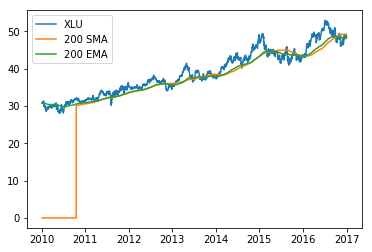

In [25]:
#plt.plot(dfP_MA.ds, df.XLU, label='AMD')

#dfP_MA['XLU'].plot()

plt.plot(dfP_MA['XLU'], label='XLU')
plt.plot(MA_200_dfP['XLU'], label='200 SMA')
plt.plot(EMA_200_dfP['XLU'], label='200 EMA')
plt.legend(loc='upper left')

#plt.plot(df.ds, rolling_mean, label='AMD 20 Day SMA', color='orange')

In [26]:
stock_list_revised = ['XLU','XLV','DIA','GDX','XLE','XLY','VNQ','XLK','XLF','XLP','IHI','XRT','RXI','IYW','VIS','KBE','FXU','SHY']

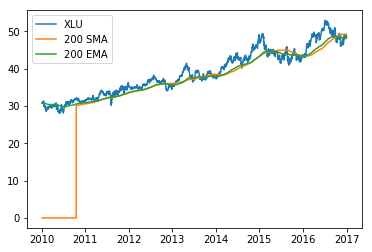

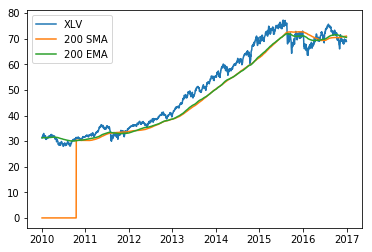

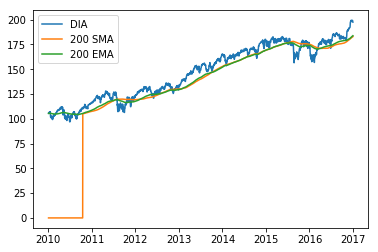

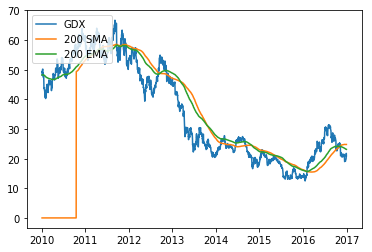

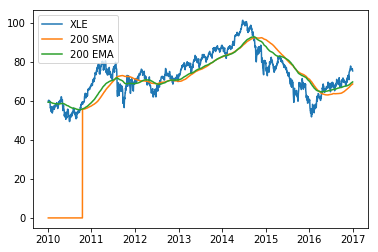

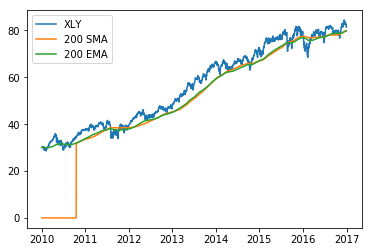

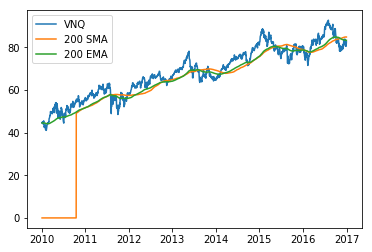

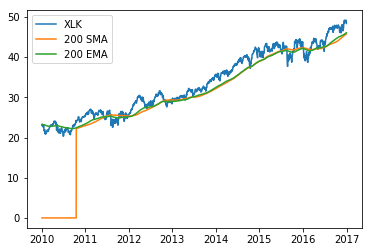

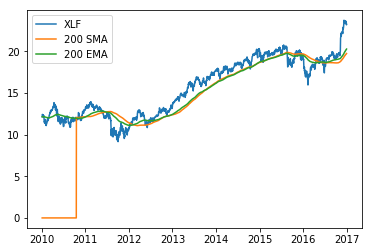

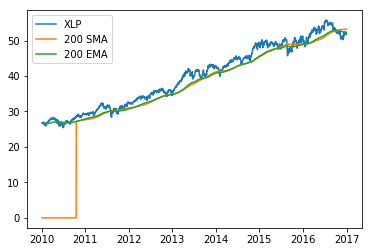

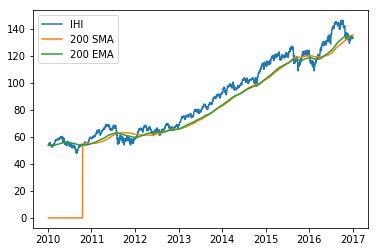

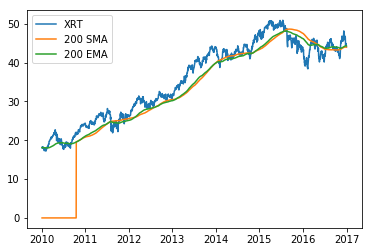

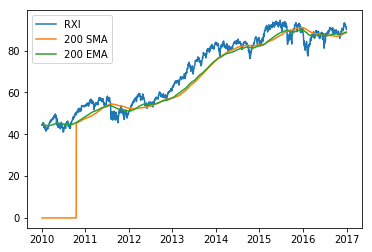

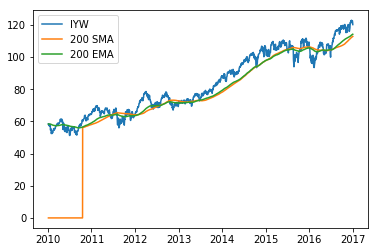

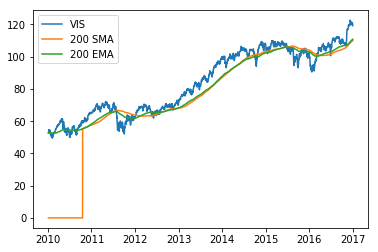

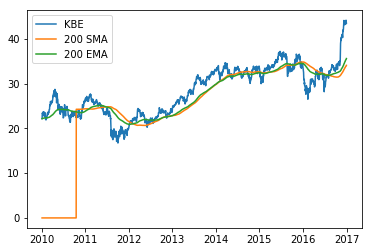

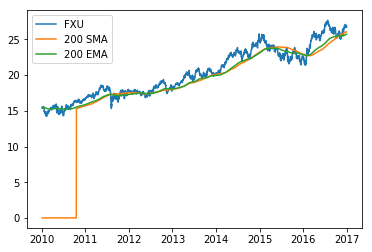

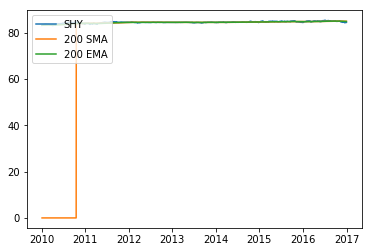

In [27]:
#plt.plot(dfP_MA.ds, df.XLU, label='AMD')

#dfP_MA['XLU'].plot()

for x in stock_list_revised:
    plt.plot(dfP_MA[x], label=x)
    plt.plot(MA_200_dfP[x], label='200 SMA')
    plt.plot(EMA_200_dfP[x], label='200 EMA')
    plt.legend(loc='upper left')
    plt.show()

#plt.plot(df.ds, rolling_mean, label='AMD 20 Day SMA', color='orange')

Next play around with the following:

if (dfP_MA.x > MA_200_dfP.x && dfP_MA.x > EMA_200_dfP.x):
    df_MA_Check.x = 1
else:
    df_MA_Check.x = 0

In [15]:
df_MA_Check = MA_200_dfP

In [28]:
for x in stock_list_revised:
    for y in range(len (dfP_MA)):
        if (dfP_MA[x][y] > EMA_200_dfP[x][y]):
            df_MA_Check[x][y] = 1
        else:
            df_MA_Check[x][y] = 0

In [29]:
dfP_MA.head()

,XLU,XLV,DIA,GDX,XLE,XLY,VNQ,XLK,XLF,XLP,IHI,XRT,RXI,IYW,VIS,KBE,FXU,SHY
Date,,,,,,,,,,,,,,,,,,
2010-01-05,30.709999,31.299999,105.489998,48.169998,59.290001,30.110001,44.500000,23.240000,12.152721,26.680000,53.779999,18.084999,44.410000,58.400002,52.770000,22.180000,15.45,83.169998
2010-01-06,30.889999,31.620001,105.559998,49.340000,60.000000,30.150000,44.419998,22.980000,12.177092,26.660000,54.389999,18.250000,44.430000,57.990002,52.900002,22.469999,15.47,83.180000
2010-01-07,30.750000,31.730000,105.940002,49.099998,59.910000,30.400000,44.900002,22.889999,12.437043,26.660000,54.630001,18.299999,44.650002,57.770000,53.549999,23.410000,15.41,83.160004
2010-01-08,30.719999,31.780001,106.110001,49.840000,60.299999,30.389999,44.570000,23.040001,12.363932,26.570000,54.689999,18.260000,45.009998,58.209999,54.259998,23.320000,15.35,83.239998
2010-01-11,31.040001,31.959999,106.540001,50.169998,60.220001,30.330000,44.830002,22.950001,12.372055,26.639999,55.029999,18.205000,45.200001,57.930000,54.770000,23.330000,15.49,83.279999


In [32]:
EMA_200_dfP.head()

,XLU,XLV,DIA,GDX,XLE,XLY,VNQ,XLK,XLF,XLP,IHI,XRT,RXI,IYW,VIS,KBE,FXU,SHY
Date,,,,,,,,,,,,,,,,,,
2010-01-05,30.709999,31.299999,105.489998,48.169998,59.290001,30.110001,44.500000,23.240000,12.152721,26.680000,53.779999,18.084999,44.410000,58.400002,52.770000,22.180000,15.450000,83.169998
2010-01-06,30.711790,31.303183,105.490694,48.181640,59.297066,30.110399,44.499204,23.237413,12.152964,26.679801,53.786068,18.086641,44.410199,58.395922,52.771294,22.182886,15.450199,83.170098
2010-01-07,30.712170,31.307430,105.495165,48.190778,59.303164,30.113280,44.503192,23.233956,12.155791,26.679604,53.794466,18.088764,44.412585,58.389694,52.779042,22.195096,15.449799,83.169997
2010-01-08,30.712248,31.312132,105.501283,48.207188,59.313083,30.116034,44.503857,23.232026,12.157862,26.678514,53.803377,18.090468,44.418529,58.387906,52.793778,22.206289,15.448806,83.170694
2010-01-11,30.715509,31.318579,105.511618,48.226718,59.322107,30.118163,44.507102,23.229220,12.159993,26.678130,53.815582,18.091607,44.426305,58.383350,52.813442,22.217470,15.449216,83.171781


In [34]:
df_MA_Check.tail(75)

,XLU,XLV,DIA,GDX,XLE,XLY,VNQ,XLK,XLF,XLP,IHI,XRT,RXI,IYW,VIS,KBE,FXU,SHY
Date,,,,,,,,,,,,,,,,,,
2016-09-15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2016-09-16,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2016-09-19,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2016-09-20,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2016-09-21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2016-12-27,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2016-12-28,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [35]:
df_MA_Check.to_csv("EMA_Check.csv")